# Making Attractive 2-D Vector Diagrams in Python with PlotVec

(Note that the figures below use my matplotlibrc file, which is included in the GitHub repository for plotvec.)

Let's start by loading the `plotvec()` function and plotting a single vector:

\begin{align*}
\mathbf{a} &= [2,3]^T
\end{align*}

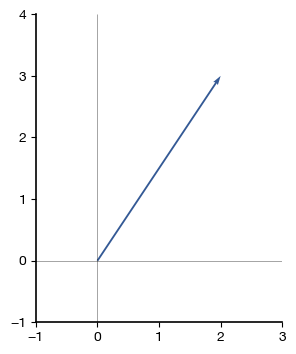

In [1]:
import numpy as np
from plotvec import plotvec

a = np.array([2, 3])

plotvec(a)

We can add multiple vectors to the diagram easily. Let's add these vectors:

Let's start by loading the `plotvec()` function and plotting a single vector:

\begin{align*}
\mathbf{b} &=[1,-2]^T
\mathbf{c} &=[-1,-1]^T
\end{align*}

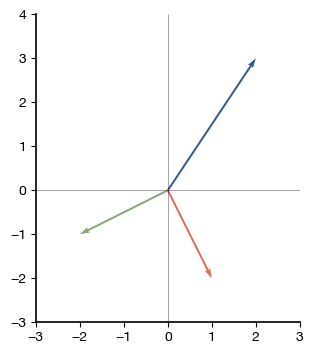

In [2]:
a = np.array([2, 3])
b = np.array([1, -2])
c = np.array([-2, -1])

plotvec(a, b, c)

Note that by default `plotvec()` uses an equal aspect ratio -- this is important in many vector diagrams, for instance to tell whether two vectors are orthogonal. For instance, in the diagram above, vectors `b` and `c` are at 90 degree angles because they are orthogonal.

If an equal aspect ratio is not needed, `plotvecR()` can be used to plot vectors but orthogonal vectors will not necessarily be at 90 degree angles:

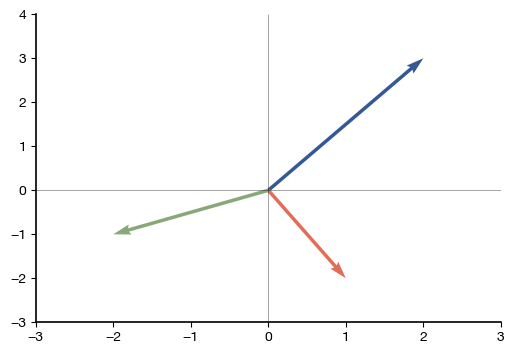

In [3]:
from plotvec import plotvecR

plotvecR(a, b, c)

A legend can be added by specifying labels:

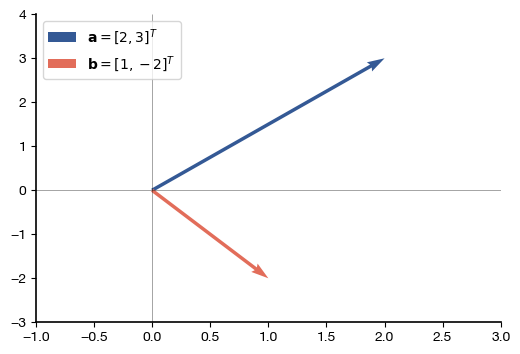

In [4]:
import numpy as np
from plotvec import plotvec, plotvecR

a = np.array([2, 3])
b = np.array([1, -2])

plotvecR(a, b,
        labels = ['$\mathbf{a} = [ 2,3]^T$',
                  '$\mathbf{b} = [ 1, -2]^T$'],
        legendloc='upper left')

By default, vectors will be plotted with their tails at the origin (0,0).  We can specify a different tail using the `tail` keyword argument:

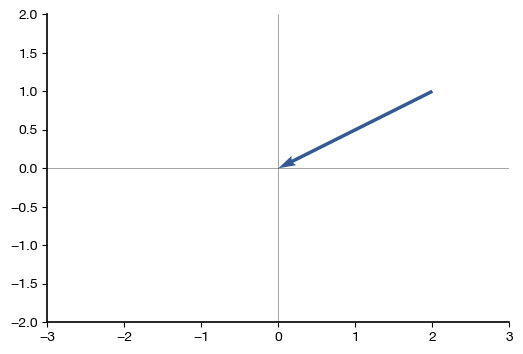

In [5]:
plotvec(c, tail=[2,1])

When plotting a sequence of vectors, we can have the tail of each vector be positioned at the head of the previous vector by settin `chain=True`:

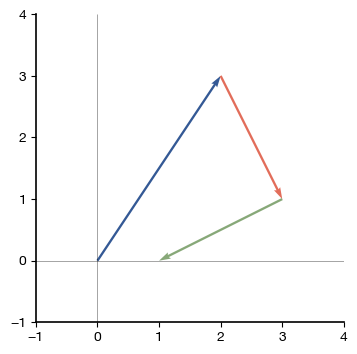

In [6]:
plotvec(a, b, c, chain=True)

When plotting with `chain=True`, the head of the last vector is at the position of the sum of the vectors. We can ask `plotvec()` to show this sum as a vector using `plotsum=True`:

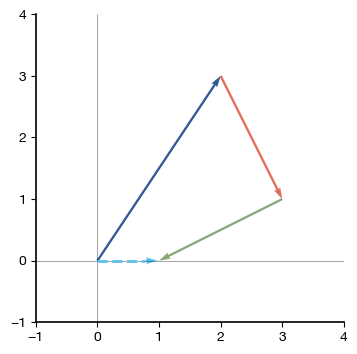

In [7]:
plotvec(a, b, c, chain=True, plotsum=True)

You can combine plot the result of multiple `plotvec()` commands on the same axes by specifying `newfig=False`. When using this option, it is good to either specify the colors of the vectors or else use the `color_offset` keyword parameter to tell later calls where to start in the color cycle. The example below also shows how to use `plot.annotate()` to label vectors:

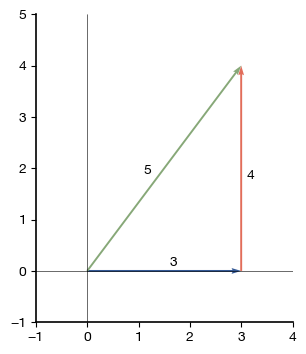

In [8]:
import matplotlib.pyplot as plt

plotvec([3,0], [0,4], chain=True);
plotvec([3,4], newfig=False, color_offset=2)
plt.annotate('3', (1.6, 0.1) );
plt.annotate('4', (3.1, 1.8) );
plt.annotate('5', (1.1, 1.9) );